<a href="https://colab.research.google.com/github/giorgiagandolfi/laboratory_of_bioinformatics1/blob/master/tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the tables containig, for a different thresholds in the range 1 - 1e-19, the accurancy, the Matthew's correlation coefficient, the true positives rates, the false negatives rates, the false positives rate and the true negatives rate.



In [0]:
import pandas as pd
url1 = 'https://raw.githubusercontent.com/giorgiagandolfi/laboratory_of_bioinformatics1/master/results_set1.csv'
url2 = 'https://raw.githubusercontent.com/giorgiagandolfi/laboratory_of_bioinformatics1/master/results_set2.csv'
names = ['thrshold','accurancy','mcc','TP','FN','FP','TN']
data1 = pd.read_csv(url1, names = names)
data2 = pd.read_csv(url2, names = names)


In [0]:
data1

,thrshold,accurancy,mcc,TP,FN,FP,TN
0,1.000000e+00,0.720056,0.040192,177,78699,0,202248
1,1.000000e-01,0.963699,0.128177,177,10205,0,270742
2,1.000000e-02,0.995884,0.363507,177,1157,0,279790
3,1.000000e-03,0.999755,0.848136,177,69,0,280878
4,1.000000e-04,0.999947,0.960118,177,15,0,280932
5,1.000000e-05,0.999989,0.991626,177,3,0,280944
6,1.000000e-06,0.999993,0.994394,177,2,0,280945
7,1.000000e-07,0.999996,0.997185,177,1,0,280946
8,1.000000e-08,1.000000,1.000000,177,0,0,280947
9,1.000000e-09,1.000000,1.000000,177,0,0,280947


In [0]:
data2

,thrshold,accurancy,mcc,TP,FN,FP,TN
0,1.000000e+00,0.719740,0.040274,178,78788,0,202159
1,1.000000e-01,0.962518,0.126448,178,10537,0,270410
2,1.000000e-02,0.995991,0.368580,178,1127,0,279820
3,1.000000e-03,0.999644,0.800037,178,100,0,280847
4,1.000000e-04,0.999900,0.929511,178,28,0,280919
5,1.000000e-05,0.999964,0.972745,177,9,1,280938
6,1.000000e-06,0.999968,0.975147,176,7,2,280940
7,1.000000e-07,0.999982,0.985989,176,3,2,280944
8,1.000000e-08,0.999989,0.991548,176,1,2,280946
9,1.000000e-09,0.999989,0.991548,176,1,2,280946


## Apply the threshold of 1e-12 to set2. 

In [0]:
from google.colab import files
uploaded = files.upload()

With the following command we want to find into the positive set, the protein with an e-value higher than the threshold used for the classification. The resulting proteins are **false negatives**: they are classified as negatives even if having the Kunitz domain.

In [0]:
!awk '{if($2>1e-12) print $0}' positive_set2.out

Q9BQY6
P86963
Q11101
O62247
D3GGZ8
 Are false negatives. Let's see their peculiarites by going to UniProtKB database.

 1. **O62247**: appears to lack serine protease inhibitor activity in vitro when tested with bovine pancreatic alpha-chymotrypsin and elastase. It is uncertain if its acitvity is genuine as bli-5 lacks all the catalytic features of serine proteases.
 2. **Q9BQY6** is classified as WAP four-disulfide core domain protein (26-73) but contains also the BPTI/KUnitz domain
 3. **Q11101** has a BPTI/Kunitz inhibitor domain-containing protein C02F12.5. The BPTI domain is shorter than the general one (54 residues despite 58)
 4. **P86963** is classified as BPTI/Kunitz domain-containing protein 2 but contains the 54 resdiues BPTI domain
 5. **D3GGZ8** is classifieed as Kunitz-type protein bli-5, as O62247, but has a longer BPTI/Kunitz inhibitor domain of 71 residues. 

With the following command we want to find the false positives: proteins with an e-vale lower than the threshold for the classification but does not contain the BPTI/Kunitz inhibitor domain. 

In [0]:
!awk '{if($2<=1e-12) print $0}' ok_negative_set2.out

**G3LH89** has an e-value of 1e-23 but is classified as negative. Let's see why. G3LH89 is a Kunitz-type serine protease inhibitor Bi-KTI: it inhibits plasmin and acts as an antifibrinolityic agent. It contains a BPTI/Kunitz inhibitor of 51 residues and belongs to the venom Kunitz-type family.

In [0]:
!sort -gk 2 ok_negative_set2.out | head

In [0]:
!sort -grk 2 positive_set2.out| head

##Apply the threshold of 1e-09 to set1. 

In [0]:
from google.colab import files
uploaded_1 = files.upload()

In [0]:
!awk '{if($2>1e-09) print $0}' positive_set1.out

In [0]:
!awk '{if($2<=1e-09) print $0}' ok_negative_set1.out

In [0]:
!sort -gk 2 ok_negative_set1.out | head

In [0]:
!sort -grk 2 positive_set1.out | head

# ROC curve

<function matplotlib.pyplot.show>

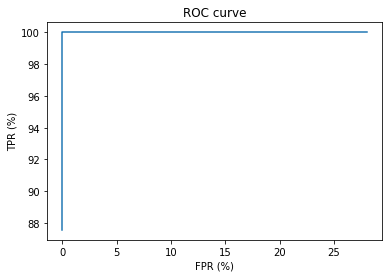

In [0]:
import numpy as np
import matplotlib.pyplot as plt
FP = np.array([28.012044976454636, 3.632357704478069, 0.4118214467497428, 0.02455979241636323, 0.00533908530790505, 0.00106781706158101, 0.0007118780410540065, 0.00035593902052700327, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
TP = np.array([100.0, 100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0, 99.43502824858757, 98.87005649717514, 97.17514124293785, 95.48022598870057, 95.48022598870057, 92.09039548022598, 87.57062146892656])
plt.plot(FP,TP)
plt.title('ROC curve')
plt.xlabel('FPR (%)')
plt.ylabel('TPR (%)')
plt.show


In [0]:
import numpy as np
import matplotlib.pyplot as plt
FPR = np.array([28.043723549281534, 3.750529459293034, 0.40114327613393275, 0.035593902052700334, 0.009966292574756093, 0.00320345118474303, 0.0024915731436890233, 0.00106781706158101, 0.00035593902052700327, 0.00035593902052700327, 0.00035593902052700327, 0.00035593902052700327, 0.00035593902052700327, 0.00035593902052700327, 0.00035593902052700327, 0.00035593902052700327, 0.00035593902052700327, 0.00035593902052700327, 0.00035593902052700327, 0.00035593902052700327])
TPR = np.array([100.0, 100.0, 100.0, 100.0, 100.0, 99.43820224719101,98.87640449438202, 98.87640449438202, 98.87640449438202, 98.87640449438202, 98.31460674157303, 97.19101123595506, 97.19101123595506, 96.62921348314607, 96.06741573033707, 94.3820224719101, 92.69662921348315, 92.13483146067416, 88.20224719101124, 84.26966292134831]
plt.plot(FPR, TPR)
plt.title('ROC curve')
plt.xlabel('FPR (%)')
plt.ylabel('TPR (%)')
plt.show